箱线图（boxplot）是一种用于显示数据分布概括的标准化方式。它通过展示数据的中位数、四分位数和异常值，帮助我们快速了解数据的中心趋势、离散程度以及是否存在异常值。

以下是箱线图各个组成部分的解释：

*   **箱体（Box）：** 箱体的上下边缘分别表示数据的**上四分位数（Q3）** 和 **下四分位数（Q1）**。  Q1 是数据集中较小的 25% 的值的上限，Q3 是数据集中较大的 25% 的值的下限。因此，箱体包含了数据集中间 50% 的数据。

*   **箱体内的线：** 箱体内部通常会有一条线，表示数据的**中位数（Median）**。中位数是将数据集分成上半部分和下半部分的中间值。

*   **须线（Whiskers）：**  从箱体的上下边缘延伸出来的两条线被称为须线。须线通常延伸到距离箱体边缘 1.5 倍四分位距（IQR = Q3 - Q1）的范围内，或者延伸到数据中的最大值和最小值（如果它们在该范围内）。

*   **离群点（Outliers）：**  超出须线范围的点通常被认为是**离群点**。这些点表示与其他数据点显著不同的异常值。离群点的具体定义和计算方法可能会根据不同的统计软件或库而略有不同。

**如何解释箱线图：**

*   **中心趋势：** 中位数的位置可以帮助我们了解数据的中心趋势。如果中位数更靠近箱体的底部，则表示数据分布可能向较小的值倾斜；如果更靠近顶部，则可能向较大的值倾斜。

*   **离散程度：** 箱体的长度（IQR）反映了数据的离散程度。箱体越长，表示中间 50% 的数据分布越分散。须线的长度也可以提供关于数据范围和变异性的信息。

*   **对称性：** 如果中位数接近箱体的中心，且上下须线的长度大致相等，则表示数据分布相对对称。如果中位数偏向一边，或者须线长度差异较大，则表示数据分布可能存在偏斜。

*   **异常值：** 离群点的存在提示我们数据中可能存在异常或特殊的观测值，需要进一步调查其原因。



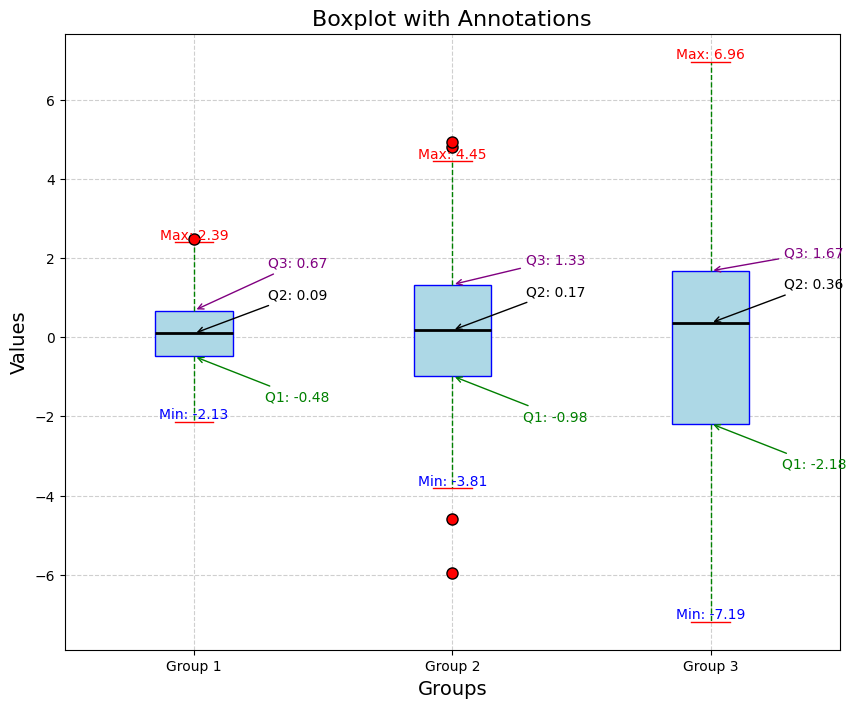

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 生成一些示例数据
np.random.seed(10)
data = [np.random.normal(0, std, 100) for std in range(1, 4)]

# 设置图表尺寸（增加高度以避免文本重叠）
plt.figure(figsize=(10, 8))  # 增加高度为 8

# 绘制箱线图
box = plt.boxplot(data, patch_artist=True, tick_labels=['Group 1', 'Group 2', 'Group 3'],
                  boxprops=dict(facecolor='lightblue', color='blue'),  # 箱体颜色
                  whiskerprops=dict(color='green', linestyle='--'),    # 须线样式
                  capprops=dict(color='red'),                         # 须线端点样式
                  medianprops=dict(color='black', linewidth=2),       # 中位数线样式
                  flierprops=dict(marker='o', markerfacecolor='red', markersize=8))  # 异常值样式

# 添加标题和标签
plt.title('Boxplot with Annotations', fontsize=16)
plt.ylabel('Values', fontsize=14)
plt.xlabel('Groups', fontsize=14)

# 添加网格线
plt.grid(True, linestyle='--', alpha=0.6)

# 标注每个关键点的位置
for i, group_data in enumerate(data):
    # 计算关键点
    q1 = np.percentile(group_data, 25)
    q2 = np.percentile(group_data, 50)
    q3 = np.percentile(group_data, 75)
    iqr = q3 - q1
    lower_whisker = np.min(group_data[group_data >= q1 - 1.5 * iqr])
    upper_whisker = np.max(group_data[group_data <= q3 + 1.5 * iqr])

    # 标注最小值
    plt.text(i + 1, lower_whisker, f'Min: {lower_whisker:.2f}', fontsize=10, color='blue', ha='center', va='bottom')

    # 标注 Q1 使用箭头
    plt.annotate(f'Q1: {q1:.2f}', xy=(i + 1, q1), xytext=(i + 1.4, q1 - 1.2),
                 fontsize=10, color='green', ha='center', va='bottom',
                 arrowprops=dict(arrowstyle='->', color='green'))

    # 标注 Q2 (中位数) 使用箭头
    plt.annotate(f'Q2: {q2:.2f}', xy=(i + 1, q2), xytext=(i + 1.4, q2 + 0.8),
                 fontsize=10, color='black', ha='center', va='bottom',
                 arrowprops=dict(arrowstyle='->', color='black'))

    # 标注 Q3 使用箭头（调整到 Q2 的上方）
    plt.annotate(f'Q3: {q3:.2f}', xy=(i + 1, q3), xytext=(i + 1.4, q2 + 1.6),  # 将 Q3 的标注放在 Q2 的上方
                 fontsize=10, color='purple', ha='center', va='bottom',
                 arrowprops=dict(arrowstyle='->', color='purple'))

    # 标注最大值
    plt.text(i + 1, upper_whisker, f'Max: {upper_whisker:.2f}', fontsize=10, color='red', ha='center', va='bottom')

# 保存图片到当前目录
# plt.savefig('boxplot_annotated_with_arrows_final_adjusted.png', dpi=300, bbox_inches='tight')

# 显示图表
plt.show()
